In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [2]:
df = pd.read_csv('Project1_data.csv')

In [3]:
#functions to format data
df = df[df.Year != 2013]

def time_convert(x):
    times = x.split(':')
    return (3600*int(times[0])+60*int(times[1]))+int(times[2])

t = df.Time.apply(time_convert)
df.Time = t

def pace_convert(x):
    times = x.split(':')
    return (60*int(times[0])+int(times[1]))

p = df.Pace.apply(pace_convert)
df.Pace = p

def gender_convert(x):
    if (x == 'M'):
        return 0
    else:
        return 1
g = df.Sex.apply(gender_convert)
df.Sex = g
def check_professionals(x):
    if (x >= 10800):
        value = 1 
    else:
        value = 0
    return value
df['Pro_or_Amature'] = df.Time.apply(check_professionals)

In [4]:
df.columns=['Id','Name','Age','Sex','Rank','Time','Pace','Year','Pro_or_Amature']

In [5]:
#Normalize the data
cols_to_norm = ['Age','Rank','Time']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [6]:
data_raw = df
f = {'Age':['mean'],'Rank':['mean'],'Time':['mean']}
data_editted = data_raw.groupby(['Id','Name','Sex','Pro_or_Amature'],as_index=False).agg(f)

In [7]:
data_editted.columns = data_editted.columns.droplevel(1)

In [8]:
#Separating the Y vector
Y = data_editted.Time.values

In [9]:
#Seprating the X vector 
X= pd.concat([data_editted['Age'], data_editted['Rank'],data_editted['Pro_or_Amature'],data_editted['Sex']],axis=1)
X1 = X.values
X = np.insert(X1,0,1, axis=1)# adding a column of 1's for the bias term

In [10]:
#Splitting the data in test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X ,Y , test_size = 0.2, random_state = 0)

/Users/anilpatil/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
#Gradient Descent settings
theta = np.random.random((X_train.shape[1]))/100
iterations = 7500
alpha = 0.01

In [12]:
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    m = y.size

    hypothesis = X.dot(theta)

    Errors = (hypothesis - y)

    Cost = (1.0 / (2 * m)) * Errors.T.dot(Errors)

    return Cost

In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    cost_history = np.zeros(shape=(num_iters, 1))
    convergence = False
    for i in range(num_iters):
        c = (X.dot(theta)-y)
        c = c.T.dot(X)
        theta = theta-alpha*(c/m)
        cost_history[i, 0] = compute_cost(X, y, theta)
        cost_temp = cost_history[i,0]
        cost_previous = cost_history[i-1,0]

   
    plt.plot(cost_history)
       # plt.axis([0, 5000,0,0.05])
    plt.title("Progression of the cost function wrt number of iterations\n")
    plt.ylabel("Cost Function")
    plt.xlabel("Number of Iterations")
    plt.show()
    print "Model Parameters:"
    print theta

    return theta, cost_history

In [14]:
def Cross_validation(x,y,theta,w):
    
    # Implimenting Sklearn for comparision
    from sklearn import linear_model
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    Y_predict_sklearn = regr.predict(x)
    

    #calculating the residual error for gradient descent
    y_pred_gd = np.dot(x,theta)
    d1_gd = y-y_pred_gd
    d2_gd = y-y_pred_gd.mean()
    r2_gd = 1-  d1_gd.dot(d1_gd)/d2_gd.dot(d2_gd)
    score_gd = (((y-y_pred_gd)**2).mean())
    score1_gd= float((score_gd*26338)+3944)/float(120)
    acc_gd= 1-score_gd
    print "Metrics with gradient descent in min:"
    print "Mean Squared Error:",score1_gd
    print "R-squared:",r2_gd*100,"%"
    print "Accuracy:",acc_gd*100
    
    y_pred_ne = np.dot(x,w)
    d1_ne = y-y_pred_ne
    d2_ne = y-y_pred_ne.mean()
    r2_ne = 1-  d1_ne.dot(d1_ne)/d2_ne.dot(d2_ne)
    score_ne = ((y-y_pred_ne)**2).mean()
    score1_ne= float(((score_ne*26338)+3944))/float(120)
    acc_ne= 1-score_gd
    print "\nMetrics with normal equations:"
    print "Mean Squared Error in min:",score1_ne
    print "R-squared:",r2_ne*100,"%"
    print "Accuracy:",acc_ne*100
    
    print "\nVerifying metrics with Scikit Learn"
    d1 = y-Y_predict_sklearn
    d2 = y-Y_predict_sklearn.mean()
    r2 = 1-  d1.dot(d1)/d2_gd.dot(d2) 
    score = ((y-Y_predict_sklearn)**2).mean()
    score1= float(((score*26338)+3944))/float(120)
    acc = 1-score
    print "Mean Squared Error with Sklearn in min:",score1
    print "R-squared with Sklearn:",r2_gd*100,"%"
    print "Accuracy with Sklearn:",acc_gd*100
    

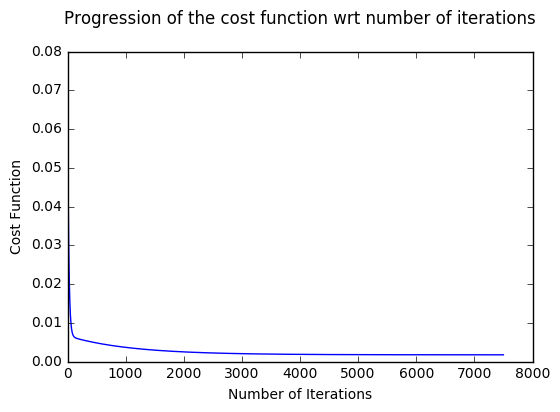

Model Parameters:
[ 0.07379468  0.04208823  0.491023    0.10238142  0.01777027]


In [15]:
#computing the initial cost
cost_initial=compute_cost(X_train,Y_train,theta)
theta , cost = gradient_descent(X_train,Y_train,theta,alpha,iterations)

In [16]:
# Linear regression using the closed form implementation:
w_normalequations= np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,Y_train))

In [17]:
print "Cross Validation on training data:\n"
Cross_validation(X_train,Y_train,theta,w_normalequations)
print "\nCross Validation on test data:\n"
Cross_validation(X_test,Y_test,theta,w_normalequations)

Cross Validation on training data:

Metrics with gradient descent in min:
Mean Squared Error: 33.6234039841
R-squared: 81.2504676025 %
Accuracy: 99.6552187786

Metrics with normal equations:
Mean Squared Error in min: 33.6213625898
R-squared: 81.3010369853 %
Accuracy: 99.6552187786

Verifying metrics with Scikit Learn
Mean Squared Error with Sklearn in min: 33.6213625898
R-squared with Sklearn: 81.2504676025 %
Accuracy with Sklearn: 99.6552187786

Cross Validation on test data:

Metrics with gradient descent in min:
Mean Squared Error: 33.6698275299
R-squared: 80.568819792 %
Accuracy: 99.6340674934

Metrics with normal equations:
Mean Squared Error in min: 33.6660504179
R-squared: 80.6602949888 %
Accuracy: 99.6340674934

Verifying metrics with Scikit Learn
Mean Squared Error with Sklearn in min: 33.6642184191
R-squared with Sklearn: 80.568819792 %
Accuracy with Sklearn: 99.6340674934


In [18]:
#Generating the prediciton file
df_final=pd.read_csv('Project1_data.csv')

In [19]:
t1 = df_final.Time.apply(time_convert)
df_final.Time = t1

In [20]:
g1 = df_final.Sex.apply(gender_convert)
df_final.Sex = g1
df_final['Pro_or_Amature'] = df_final.Time.apply(check_professionals)

In [21]:
f = {'Age Category':['mean'],'Rank':['mean'],'Time':['mean']}
df_final = df_final.groupby(['Id','Name','Sex','Pro_or_Amature'],as_index=False).agg(f)

In [22]:
df_final.columns = df_final.columns.droplevel(1)

In [23]:
Y_final = df_final.Time.values
#Seprating the X vector 
X_final= pd.concat([df_final['Age Category'], df_final['Rank'],df_final['Pro_or_Amature'],df_final['Sex']],axis=1)
X1_final = X_final.values
X_final = np.insert(X1_final,0,1, axis=1)# adding a column of 1's for the bias term

In [24]:
Y_final_prediction = np.dot(X_final,theta)

In [25]:
Y_final_prediction

array([  621.60086647,  1126.65310689,  1119.02493128, ...,   253.00066753,
         315.90398137,     6.66755389])

In [26]:
#Converting Time in hh:mm:ss format
t = []#np.zeros(shape=(df_final_predict.Time.count(), 0))
import datetime
for i in range (0,Y_final_prediction.shape[0]):
    t.append(str(datetime.timedelta(seconds = Y_final_prediction[i])))
time = np.array(t)

In [27]:
Data_submit = pd.concat([df_final['Id'],df_final['Name']],axis = 1)

In [28]:
Data_submit['Time']= time

In [29]:
Data_submit.to_csv('Results.csv',index_col = False)